# Information about previous top 100 startups

### Sectors: ICT, Life Sciences, Cleantech, Hightech, Products and Services
### Filters: Technology, Location, Founding Year, Support, University

## Data quality issues

### Inconsistent format and missing data

* 2011 top 100 startups' Excel file: fixed problem with number of rows per startup. One startup without location nor year. One startup without description.

* 2012 top 100 startups' Excel file: fixed same problem as above. One startup without description. Two startups without location.

* 2013 top 100 startups' Excel file: fixed same problem as above. Two startups without description. One startup with wrong location ("Root D4"). Three startups without location. One startup without year.

* 2014 top 100 startups' Excel file: fixed same problem as above. Two startups without description. One startup with wrong location ("Root D4"). One startup without location. Two startups without year.

* 2015 top 100 startups' Excel file: Two startups without description. One startup without location. Four startups without year.

* 2016 top 100 startups' Excel file: One startup without description. Three startups without year.

* 2017 top 100 startups' Excel file: One startup without year.

In addition to this, the description field is not complete. We would need to open the webpage of the startup and get additional textual information from there.

# Import modules

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tools for cleaning data

In [183]:
def get_clean_data(year) :
    """
    Retrieve the data corresponding to the 100 winners of a given year from an Excel file and do some cleaning of the data.
    """
    filename = '../data/WinnerStartups'+str(year)+'.xlsx'

    df = pd.read_excel(filename)
    #print(df.head())

    dfPart1 = df.loc[np.arange(0,df.shape[0],2),]
    #print(dfPart1.head())
    #print(dfPart1.shape)

    dfPart2 = df.loc[np.arange(1,df.shape[0],2),]
    #print(dfPart2['Startup'].head())

    dfPart2['City'],dfPart2['Year']=dfPart2['Startup'].str.split(', ',1).str
    #print(dfPart2[['City','Year']].head())

    dfPart1Temp = dfPart1.reset_index()
    #print(dfPart1Temp.head())

    dfPart2Temp = dfPart2.reset_index()
    #print(dfPart2Temp.head())

    dfClean = pd.DataFrame()
    # dfClean = pd.DataFrame(dtype={'Rank':'int64','Startup':'string','Description':'string','City':'string','Year':'int64'})
    for col in ['Rank','Startup','Description'] :
        dfClean[col] = dfPart1Temp[col]
    for col in ['City','Year'] :
        dfClean[col] = dfPart2Temp[col]

    dfClean['Rank'] = pd.to_numeric(df['Rank'])
    # dfClean['Year'] = pd.to_numeric(df['Year'])
    dfClean['Startup'].astype(str)
    
    return dfClean

# Market analysis 

In [184]:
macro_sectors = ['ICT','Life Sciences','Cleantech','Hightech','Products and Services']
sectorsDict = {
    'ICT':[
        'Advertising',
        'Applications',
        'AR/VR/MR',
        'Big Data',
        'Blockchain',
        'Cloud',
        'Consumer',
        'Digital Health',
        'Ecommerce',
        'Enterprise',
        'Gaming',
        'Internet',
        'IoT',
        'Machine Learning/AI',
        'Marketplace',
        'Media',
        'Mobile',
        'Open source',
        'SaaS',
        'Security',
        'Social networks',
        'Software',
        'Wearable technologies'
    ],
    'Life Sciences':[
        'Antibodies',
        'Bioinformatics',
        'Biomaterials',
        'Biotech',
        'Cancer',
        'Cardiovascular',
        'Diagnostics',
        'Drug development platforms',
        'Drug discovery',
        'Healthcare infrastructure',
        'Infection',
        'Imaging and Radiology',
        'Inflammation',
        'Medical devices',
        'Medtech',
        'Neurology',
        'Organ and Tissues',
        'Patient monitoring',
        'Protein drugs',
        'Rehab',
        'Screening',
        'Small molecule drugs',
        'Surgery',
        'Urology',
        'Vaccines',
        'Wound management',
        ],
    'Cleantech':[
        'Air and Environment',
        'Cleantech',
        'Energy efficiency',
        'Energy production',
        'Energy storage',
        'Mobility',
        'Renewable energy',
        'Smart Home',
        'Smart Power, Green Grid',
        'Solar',
        'Water and wastewater',
    ],
    'Hightech':[
        'AgriTech',
        'Automotive',
        'Aviation and Aerospace',
        'Chemicals',
        'Drones',
        'Electronics',
        'Materials',
        'Hightech',
        'Instruments',
        'Mechanics',
        'Micro technologies',
        'Nano technologies',
        'Optics',
        'Robotics',
        'Sensors',
        'Semiconductors',
        'Wireless',
        'Interdisciplinary',
    ],
    'Products and Services':[
        'Consumer products',
        'Communications',
        'Consulting services',
        'Education',
        'Finance',
        'Fintech',
        'Food',
        'Hardware',
        'Marketing services',
        'OEM, Production',
        'Real estate and construction',
        'Research and development',
        'Services for companies',
        'Services for consumers',
        'Sport',
    ],
}

In [185]:
# From wayback machine, going back to the historical version of the website.
data = pd.DataFrame(columns=['Year']+macro_sectors)
data['Year']=[2017,2016,2015,2014,2013,2012,2011]
data['ICT']=[196,150,120,90,78,30,0]
data['Life Sciences']=[135,107,85,68,64,30,0]
data['Cleantech']=[31,34,27,26,35,9,0]
data['Hightech']=[126,64,89,68,81,24,0]
data['Products and Services']=[61,57,44,33,27,4,0]
data.head(7)

,Year,ICT,Life Sciences,Cleantech,Hightech,Products and Services
0,2017,196,135,31,126,61
1,2016,150,107,34,64,57
2,2015,120,85,27,89,44
3,2014,90,68,26,68,33
4,2013,78,64,35,81,27
5,2012,30,30,9,24,4
6,2011,0,0,0,0,0


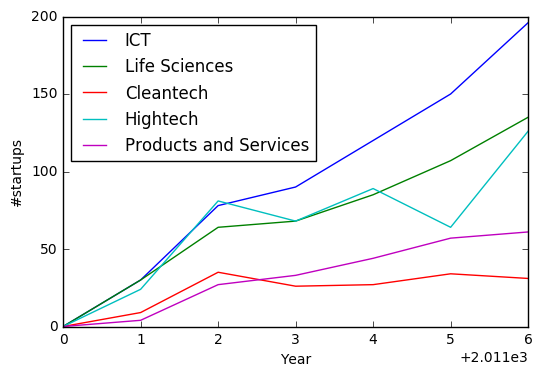

In [186]:
plt.figure(1)
plt.plot(data['Year'],data['ICT'])
plt.plot(data['Year'],data['Life Sciences'])
plt.plot(data['Year'],data['Cleantech'])
plt.plot(data['Year'],data['Hightech'])
plt.plot(data['Year'],data['Products and Services'])
plt.xlabel('Year')
plt.ylabel('#startups')
plt.legend(loc='best')
plt.show()
plt.savefig('../results/Trends.pdf',format='pdf')

In [307]:
import folium

In [308]:
kanton_map = folium.Map(location=[46.8, 8.33], zoom_start=7)
kanton_map

# Data processing

In [188]:
years = [2017,2016,2015,2014,2013,2012,2011]

dfDict = {}

for year in years :
    print('Year:',year)
    dfDict[year] = get_clean_data(year)
    print(dfDict[year].head())

Year: 2017
   Rank        Startup                                        Description  \
0   1.0         Ava AG  Ava crafts a natural and reliable technology t...   
1   NaN    L.E.S.S. SA  L.E.S.S. SA (“Light Efficient SystemS”) has pr...   
2   2.0  Flyability SA  Flyability is developing Gimball, a game-chang...   
3   NaN       bexio AG  bexio develops and sells an accounting softwar...   
4   3.0    MindMaze SA  MindMaze combines immersive virtual reality, b...   

         City  Year  
0      Zürich  2014  
1    Ecublens  2012  
2    Lausanne  2014  
3  Rapperswil  2013  
4    Ecublens  2012  
Year: 2016
   Rank                                        Startup  \
0   1.0                                    L.E.S.S. SA   
1   NaN                                       Bcomp AG   
2   2.0  Knip AG (acquired by Digital Insurance Group)   
3   NaN                                  Flyability SA   
4   3.0                             Sophia Genetics SA   

                                  

In [189]:
# Prepare a dictionary with keys corresponding to years and values corresponding to list of top 100 winners of that year. 
# Useful to loop over startups.
winnersDict = {}
for year in years:
    winnersDict[year] = dfDict[year]['Startup'].values
    # print(winnersDict[year])

In [190]:
# For each year, add a column to the corresponding dataframe with the number of times the startup was in the top 100 winners.
def count(startup,year) :
    counter = 0
    for i_year in years :
        if (i_year<year) :
            if (startup in winnersDict[i_year]) :
                counter += 1
    return counter

In [191]:
# Example of how to apply a function to each row.
df = pd.DataFrame()
df['A'] = [1,2,3]
df['B'] = [4,5,6]
df['C'] = df['A'].apply(np.sqrt)
print(df.head())

   A  B         C
0  1  4  1.000000
1  2  5  1.414214
2  3  6  1.732051


In [192]:
# For each startup, search for the startup name in the database of the previous years and increment a counter.
for year in years :
    dfDict[year]['Previous wins'] = dfDict[year]['Startup'].apply(count,year=year)
    print('Year:', year)
    print('Min #wins:', dfDict[year]['Previous wins'].min())
    print('Max #wins:', dfDict[year]['Previous wins'].max())
    idmax = dfDict[year]['Previous wins'].idxmax()
    print('Company corresponding to max #wins:', idmax)
    startup_max = dfDict[year]['Startup'][idmax]
    print('Company corresponding to max #wins:',startup_max)

Year: 2017
Min #wins: 0
Max #wins: 5
Company corresponding to max #wins: 1
Company corresponding to max #wins: L.E.S.S. SA
Year: 2016
Min #wins: 0
Max #wins: 5
Company corresponding to max #wins: 1
Company corresponding to max #wins: Bcomp AG
Year: 2015
Min #wins: 0
Max #wins: 4
Company corresponding to max #wins: 1
Company corresponding to max #wins: Abionic SA
Year: 2014
Min #wins: 0
Max #wins: 3
Company corresponding to max #wins: 0
Company corresponding to max #wins: InSphero AG
Year: 2013
Min #wins: 0
Max #wins: 2
Company corresponding to max #wins: 0
Company corresponding to max #wins: HouseTrip SA (acquired by TripAdvisor)
Year: 2012
Min #wins: 0
Max #wins: 1
Company corresponding to max #wins: 0
Company corresponding to max #wins: HouseTrip SA (acquired by TripAdvisor)
Year: 2011
Min #wins: 0
Max #wins: 0
Company corresponding to max #wins: 0
Company corresponding to max #wins: Optotune AG


In [193]:
# Check the 2012 startup that won the highest number of times in the past.
dfDict[2012].query("Startup=='HouseTrip SA (acquired by TripAdvisor)'")

,Rank,Startup,Description,City,Year,Previous wins
0,1.0,HouseTrip SA (acquired by TripAdvisor),HouseTrip is one of Europe’s largest holiday r...,London W1T 7RJ,2009,1


In [194]:
# Example for 2011 dataset. In this case, there are no previous years available, so it makes sense that the cunter is zero for all startups.
dfDict[2011]['Previous wins'] = dfDict[2011]['Startup'].apply(count,year=2011)
print(dfDict[2011]['Previous wins'].head())
print(dfDict[2011]['Previous wins'].min())
print(dfDict[2011]['Previous wins'].max())

0    0
1    0
2    0
3    0
4    0
Name: Previous wins, dtype: int64
0
0


Some fields in the dataset have null values. Replace them with default values that can be handled in the next steps.
In particular, need to have something in the "Description" field, since this is used by the CountVectorizer.

In [195]:
for year in years :
    dfDict[year]['Description'].fillna('',inplace=True)
#print(dfDict[2017]['Description'][:30])

# Keywords and information retrieval

In [196]:
# Add information on sector and keywords for each startup in the historical database.
# How?

# Field we might want to add: 
# "Uni spin-off", 
# "Technology", 
# "Incorporation Date",
# "Number of Employees".

Use the description field of the top 100 winners to extract information on the sector and on the keywords.
Use the sklearn CountVectorizer to do that.

In [197]:
# Example using the CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer('content',strip_accents='unicode',ngram_range=(1,1),stop_words='english',max_features=5,max_df=0.9)
tf = tf_vectorizer.fit_transform(['Today is a nice day an an.','Another example of this day to work on an.','Try an to understand the examples.'])
tf_feature_names = tf_vectorizer.get_feature_names()
tf_stop_words = tf_vectorizer.get_stop_words()
print(tf_vectorizer)
print(tf)
print(tf_feature_names)
# print(tf_stop_words)
test = tf_vectorizer.transform(['Hello this is a great day.'])
print(test)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=5, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 0)	1
  (0, 3)	1
  (0, 4)	1
  (1, 1)	1
  (1, 0)	1
  (2, 2)	1
['day', 'example', 'examples', 'nice', 'today']
  (0, 0)	1


# 2018 data

In [198]:
df2018 = pd.read_excel("../data/startup.ch 2013 - 2018.xlsx",dtypes={'Salutation':'string','Firstname':'string','Lastname':'string','Startup':'string','City':'string','Uni spin-off':'string','Technology':'string','Incorporation Date':'string','Number of Employees':'int64','1Liner':'string','Description':'stirng'})

In [199]:
df2018.rename(columns={'Company':'Startup'},inplace=True)

In [201]:
print('Available information:',df2018.columns)

Available information: Index(['Salutation', 'Firstname', 'Lastname', 'Startup', 'City',
       'Uni spin-off', 'Technology', 'Incorporation Date',
       'Number of Employees', '1Liner', 'Description'],
      dtype='object')


In [202]:
print('Number of columns:',df2018.shape[0])
print('Number of columns:',df2018.shape[1])

Number of columns: 667
Number of columns: 11


In [203]:
features = df2018.columns
print(features)

Index(['Salutation', 'Firstname', 'Lastname', 'Startup', 'City',
       'Uni spin-off', 'Technology', 'Incorporation Date',
       'Number of Employees', '1Liner', 'Description'],
      dtype='object')


In [204]:
df2018['Year'] = df2018['Incorporation Date'].dt.year

In [482]:
df2018.fillna('',inplace=True)
# print(df2018.head())

Let's use the CountVectorizer trained above to find how many keywords are similar between a 2018 startup and the winner startups of the previous years.
The matrix has number of rows equal to number of 2018 startups and number of columns equal to number of keywords defined above. 

In [483]:
res = tf_vectorizer.transform(df2018['Description']) # This is a sparse matrix.
# print(res)
# type(res)
res2 = res.todense()
# print(res2[1])
print(res2.shape)
total = res2.sum(axis=1) # Sum over all counts to get a simple score of "how similar the startup is to the winners of the previous years".
not_zero = np.empty((res2.shape[0],1))
for i in np.arange(res2.shape[0]) :
    not_zero[i] = np.count_nonzero(res2[i],axis=1)
# print(not_zero)
# print(total)
# print(res2)
print(res2.shape)
for i_feature, feature in enumerate(tf_feature_names) :
    df2018[feature] = res2[:,i_feature]
df2018['score'] = total
df2018['unique_score'] = not_zero
print(df2018.shape)
# print(df2018.head())
df2018Sorted = df2018.sort_values(by=['unique_score'], ascending=[0])
# print(df2018Sorted[['Startup','unique_score']][:100])
# print(str(df2018Sorted['Description'][3:5]))

(667, 10)
(667, 10)
(667, 35)


# Machine learning

Information on one-class classification:
http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

For machine learning, we need to translate the text information in numbers.
Let's start by having a look at which different values are available.

* An issue is that the same city can be written in different ways (e.g. Zurich or Zuerich or Zürich), how to address this? Name entity recognition might be one way to go.

* Another issue is that there are two many cities to be taken into account (two many categories for the machine learning algorithm). One possible approach is to simplify, from cities to cantons. 

If we ignore this issue for the moment, we can create the list of unique cities and the corresponding ID, so that the ID (numerical values) can be given as input to the machine learning algorithm.

In [325]:
def clean_city_name(city) :
    if(city == 'Zürich') or (city == 'Zuerich') or (city == 'Schlieren (Zurich)') or (city == 'Zürich - Schlieren') or (city == 'Schlieren') or (city == 'Schlieren - Zurich') or (city == 'Zürich-Schlieren') or (city == 'Zürich, Canton of Zürich, Switzerland'):
        new_city = 'Zurich'
    elif(city == 'Biel/Bienne') or (city == 'Biel') or (city == 'Bienna'):
        new_city = 'Bienne'
    elif(len(city)>0 and city[-1]==' ') :
        new_city = city.replace(' ','')
    elif(city == 'Geneve') or (city == 'Genève') :
        new_city = 'Geneva'
    elif(city == 'Neuchâtel') or (city == 'Neuchâtel 2'):
        new_city = 'Neuchatel'
    elif(city == 'Plan les Ouates') or (city == 'Plan-les-Ouates (Geneva)') or (city=='Plan-les-Ouates') or (city=='Plan-les-Quates') :
        new_city = 'Plan-Les-Ouates'
    elif(city == 'Root D4') :
        new_city = 'Root'
    elif(city == 'London W1T 7RJ') :
        new_city = 'London'
    elif(city == 'St Gallen') :
        new_city = 'St. Gallen'
    elif(city == 'Wädenswil') :
        new_city = 'Waedenswil'
    elif(city == 'Saint Sulpice') or (city == 'St-Sulpice') :
        new_city = 'Saint-Sulpice'
    elif(city == 'Baar') or (city == 'Baar (ZG)') or (city == 'Baar/Zug') :
        new_city = 'Zug'
    elif(city == 'Dübendorf (ZH)') :
        new_city = 'Dübendorf'
    else:
        new_city = city
    return new_city
    
def remove_city_duplicates(cities) :
    for i_city, city in enumerate(cities) :
        if(city == 'Zürich') or (city == 'Zuerich') or (city == 'Schlieren (Zurich)') or (city == 'Zürich - Schlieren') or (city == 'Schlieren') or (city == 'Schlieren - Zurich') or (city == 'Zürich-Schlieren') or (city == 'Zürich, Canton of Zürich, Switzerland'):
            cities[i_city] = 'Zurich'
        elif(city == 'Biel/Bienne') or (city == 'Biel') or (city == 'Bienna') :
            cities[i_city] = 'Bienne'
        elif(len(city)>0 and city[-1]==' ') :
            cities[i_city] = city.replace(' ','')
        elif(city == 'Geneve') or (city == 'Genève') :
            cities[i_city] = 'Geneva'
        elif(city == 'Neuchâtel') or (city == 'Neuchâtel 2'):
            cities[i_city] = 'Neuchatel'
        elif(city == 'Plan les Ouates') or (city == 'Plan-les-Ouates (Geneva)') or (city=='Plan-les-Ouates') or (city=='Plan-les-Quates') :
            cities[i_city] = 'Plan-Les-Ouates'
        elif(city == 'Root D4') :
            cities[i_city] = 'Root'
        elif(city == 'London W1T 7RJ') :
            cities[i_city] = 'London'
        elif(city == 'St Gallen') :
            cities[i_city] = 'St. Gallen'
        elif(city == 'Wädenswil') :
            cities[i_city] = 'Waedenswil'
        elif(city == 'Saint Sulpice') or (city == 'St-Sulpice') :
            cities[i_city] = 'Saint-Sulpice'
        elif(city == 'Baar') or (city == 'Baar (ZG)') or (city == 'Baar/Zug') :
            cities[i_city] = 'Zug'
        elif(city == 'Dübendorf (ZH)') :
            cities[i_city] = 'Dübendorf'
    return cities

for year in years :
    dfDict[year].fillna('',inplace=True)
    # dfDict[year]['City'].fillna('',inplace=True)
    # dfDict[year]['City'].fillna('',inplace=True)
    # dfDict[year]['Year'].fillna('',inplace=True)
    
    dfDict[year]['City_clean'] = dfDict[year]['City'].apply(clean_city_name)
    # print(dfDict[year]['City_clean'].head())
df2018['City_clean'] = df2018['City'].apply(clean_city_name)
df2018['City_clean'].replace('Baar','Zug',inplace=True)
# print(sorted(df2018['City_clean'].unique()))
    
cities = []
for year in years :
    new_cities = list(dfDict[year]['City_clean'].unique())
    print('Cities from',year,'competition:',len(new_cities))
    # print(new_cities)
    cities.extend(new_cities)
    # print(cities)
for i,city in enumerate(list(df2018['City_clean'].unique())) :
    cities.append(city)
# new_cities = list(df2018['City'].unique())
# print('Cities from 2018 competition:',len(new_cities))
# cities.extend(new_cities)
# print(cities)

citiesTemp = remove_city_duplicates(cities)
citiesSet = set(citiesTemp)
print('Number of cities (with duplicates) from 2011 to 2018:',len(citiesSet))
print(sorted(citiesSet))

Cities from 2017 competition: 27
Cities from 2016 competition: 28
Cities from 2015 competition: 35
Cities from 2014 competition: 42
Cities from 2013 competition: 39
Cities from 2012 competition: 39
Cities from 2011 competition: 35
Number of cities (with duplicates) from 2011 to 2018: 178
['', ' Monthey', ' Plan-les-Ouates', 'Aarau', 'Adliswil', 'Allschwil', 'Altendorf', 'Altishofen', 'Amden', 'Arth', 'Au', 'Baden', 'Baden - Daettwil', 'Basel', 'Bassersdorf', 'Bellinzona', 'Belmont sur Lausanne', 'Bern', 'Bern-Liebefeld', 'Bienne', 'Binningen', 'Bioggio', 'Birmensdorf', 'Bruegg', 'Brugg', 'Brütisellen', 'Buchs', 'Bussigny', 'Carouge', 'Cham', 'Chardonne', 'Chavannes-de-Bogis', 'Cheseaux-Lausanne', 'Châtel-Saint-Denis', 'Collonge-Bellerive', 'Conthey', 'Cupertino', 'Dietikon', 'Dietlikon', 'Dübendorf', 'Ecublens', 'Egg', 'Epalinges', 'Erlenbach', 'Estavayer-le-Lac', 'Eysins', 'Fehraltorf', 'Feusisberg', 'Flawil', 'Frauenfeld', 'Fribourg', 'Geneva', 'Givisiez', 'Gland', 'Glashütten', 'Gla

In [484]:
# Create dictionary from numbers to cities.
cityFromIDDict = {}
IDFromCityDict = {}
for id,city in enumerate(citiesSet) :
    cityFromIDDict[id] = city
IDFromCityDict = dict(zip(cityFromIDDict.values(),cityFromIDDict.keys()))

print(cityFromIDDict)
print(IDFromCityDict)

def find_key(info) :
    key = IDFromCityDict[info]
    return key

# Add this information to dataset.
df2018['CityID'] = df2018['City_clean'].apply(find_key)
# print(df2018.head())

{0: '', 1: 'Dübendorf', 2: 'Winterthur', 3: 'Meyrin', 4: 'Neuchatel', 5: 'Birmensdorf', 6: 'Reinach', 7: 'Cheseaux-Lausanne', 8: 'Brugg', 9: 'Stans', 10: 'Sursee', 11: 'Egg', 12: 'Langnau am Albis', 13: 'Schindellegi', 14: 'Volketswil', 15: 'Frauenfeld', 16: 'Arth', 17: 'c', 18: 'Novazzano', 19: 'Visp', 20: 'Langnau', 21: 'Eysins', 22: 'Lausanne', 23: 'Bern', 24: 'Cham', 25: 'Zollikon', 26: 'Morges', 27: 'Le Noirmont', 28: 'Uster', 29: 'Hersberg', 30: 'Bruegg', 31: 'Fehraltorf', 32: 'Châtel-Saint-Denis', 33: 'Stein am Rhein', 34: 'Regensdorf', 35: 'Meilen', 36: 'Hausen am Albis', 37: 'Baden - Daettwil', 38: 'Herrliberg', 39: 'Monthey', 40: 'Matten bei Interlaken', 41: 'Amden', 42: 'Heiden', 43: 'Vernier', 44: 'La Tour de Peilz', 45: 'Solothurn', 46: ' Monthey', 47: 'Widnau', 48: ' Plan-les-Ouates', 49: 'Yverdon-les-Bains', 50: 'Sarnen', 51: 'Préverenges', 52: 'Rüschlikon', 53: 'Conthey', 54: 'Lutry', 55: 'Geneva', 56: 'Hagendorn', 57: 'Aarau', 58: 'Olten', 59: 'Saint-Sulpice', 60: 'Pay

In [327]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from sklearn.model_selection import train_test_split

In [328]:
dfHistorical = pd.DataFrame()
for year in years :
    dfHistorical = dfHistorical.append(dfDict[year],ignore_index=True)
print(dfHistorical.shape[0])

696


In [329]:
# More realistic use of the CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# If max_df is very high, only words that are very general are selected.
tf_vectorizer = CountVectorizer('content',strip_accents='unicode',ngram_range=(1,3),stop_words='english',max_features=10,max_df=150)
tf = tf_vectorizer.fit_transform(list(dfHistorical['Description']))
tf_feature_names = tf_vectorizer.get_feature_names()
print('max_df=',150)
print(tf_feature_names)

# If max_df is very low, only words that are very specific are selected. This doesn't tell much on the startups.
tf_vectorizer = CountVectorizer('content',strip_accents='unicode',ngram_range=(1,3),stop_words='english',max_features=10,max_df=1)
tf = tf_vectorizer.fit_transform(list(dfHistorical['Description']))
tf_feature_names = tf_vectorizer.get_feature_names()
print('max_df=',5)
print(tf_feature_names)

# If max_df is intermediate, there are words corresponding to sectors and details about the startups.
tf_vectorizer = CountVectorizer('content',strip_accents='unicode',ngram_range=(1,3),stop_words='english',max_features=10,max_df=30)
tf = tf_vectorizer.fit_transform(list(dfHistorical['Description']))
tf_feature_names = tf_vectorizer.get_feature_names()
print('max_df=',30)
print(tf_feature_names)

max_df= 150
['based', 'developed', 'develops', 'new', 'platform', 'products', 'startup', 'swiss', 'technology', 'used']
max_df= 5
['apid', 'chocogreets', 'iland', 'karmagenes', 'pb', 'procedural', 'shops', 'silp', 'weather', 'younergy']
max_df= 30
['applications', 'cancer', 'cells', 'management', 'people', 'production', 'safety', 'solar', 'unique', 'web']


In [330]:
print(dfHistorical.shape)
print(dfHistorical.columns)
print(dfHistorical.head())
dfHistorical['City'] = dfHistorical['City'].astype(str)
dfHistorical['Year'].replace('',0,inplace=True)
dfHistorical['Year'] = dfHistorical['Year'].astype(int)
# print(sorted(dfHistorical['City'].values()))
dfHistorical['City_clean'] = dfHistorical['City'].apply(clean_city_name)
dfHistorical['City_clean'].replace('Baar','Zug',inplace=True)
dfHistorical['City_clean'].replace('Zürich','Zurich',inplace=True)
dfHistorical['CityID'] = dfHistorical['City_clean'].apply(find_key)
print(dfHistorical.columns)
print(dfHistorical.head())

res = tf_vectorizer.transform(dfHistorical['Description']) # This is a sparse matrix.
# print(res)
# type(res)
res2 = res.todense()
# print(res2[1])
print(res2.shape)
total = res2.sum(axis=1) # Sum over all counts to get a simple score of "how similar the startup is to the winners of the previous years".
not_zero = np.empty((res2.shape[0],1))
for i in np.arange(res2.shape[0]) :
    not_zero[i] = np.count_nonzero(res2[i],axis=1)
# print(not_zero)
# print(total)
# print(res2)
print(res2.shape)
for i_feature, feature in enumerate(tf_feature_names) :
    dfHistorical[feature] = res2[:,i_feature]
dfHistorical['score'] = total
dfHistorical['unique_score'] = not_zero
print(dfHistorical.shape)
print(dfHistorical.head())
dfHistoricalSorted = dfHistorical.sort_values(by=['unique_score'], ascending=[0])
print(dfHistoricalSorted[['Startup','unique_score']][:100])
# print(str(df2018Sorted['Description'][3:5]))
print(dfHistorical.head())

(696, 7)
Index(['Rank', 'Startup', 'Description', 'City', 'Year', 'Previous wins',
       'City_clean'],
      dtype='object')
  Rank        Startup                                        Description  \
0    1         Ava AG  Ava crafts a natural and reliable technology t...   
1         L.E.S.S. SA  L.E.S.S. SA (“Light Efficient SystemS”) has pr...   
2    2  Flyability SA  Flyability is developing Gimball, a game-chang...   
3            bexio AG  bexio develops and sells an accounting softwar...   
4    3    MindMaze SA  MindMaze combines immersive virtual reality, b...   

         City  Year  Previous wins  City_clean  
0      Zürich  2014              2      Zurich  
1    Ecublens  2012              5    Ecublens  
2    Lausanne  2014              2    Lausanne  
3  Rapperswil  2013              2  Rapperswil  
4    Ecublens  2012              4    Ecublens  
Index(['Rank', 'Startup', 'Description', 'City', 'Year', 'Previous wins',
       'City_clean', 'CityID'],
      dtype='obj

Before applying the model to the 2018 startups, let's see if we can predict the outcome of the 2017 competition.

In [331]:
# Train the model using the 2011-2016 winner startups. Apply to all eligible startups participating to the 2017 competition.

dfHistoricalTest = pd.DataFrame()
for year in years : 
    if year != 2017 :
        dfHistoricalTest = dfHistoricalTest.append(dfDict[year],ignore_index=True)
print(dfHistoricalTest.shape[0])

# If max_df is intermediate, there are words corresponding to sectors and details about the startups.
tf_vectorizerTest = CountVectorizer('content',strip_accents='unicode',ngram_range=(1,3),stop_words='english',max_features=10,max_df=30)
tfTest = tf_vectorizerTest.fit_transform(list(dfHistoricalTest['Description']))
tfTest_feature_names = tf_vectorizerTest.get_feature_names()
print('max_df=',30)
print(tfTest_feature_names)

596
max_df= 30
['3d', 'applications', 'cancer', 'enable', 'just', 'management', 'production', 'research', 'safety', 'unique']


In [332]:
# Get dataset of all eligible startups participating to the 2017 competition.
import json
js = json.loads(open("eligibles-by-year.json").read())
print('Year of the competition:',js.keys())
dfAll2017 = pd.DataFrame(js['2017'])
#js['2017']
dfAll2017['description'].fillna('',inplace=True)
print(dfAll2017.head())
dfAll2017.rename(columns = {'description':'Description'}, inplace = True)
print(dfAll2017.head())

Year of the competition: dict_keys(['2013', '2015', '2018', '2016', '2014', '2017'])
  city_name                                        description  founded_on  \
0      None  Based in Switzerland, they are a young forward...  2013-09-13   
1      None  Onecasa is a premier real estate  agency.  We ...  2012-11-01   
2      None  Cerri is a enterprise project collaboration so...  2015-01-01   
3      None  ObsEva SA is a Swiss-based, speciality biophar...  2012-01-01   
4      None  Relavance Software S.A. (RSSA) was formed to c...  2012-01-23   

                 name  num_employees_max  num_employees_min    rank  \
0              pCloud               50.0               11.0   15558   
1             OneCasa               10.0                1.0  426201   
2               Cerri              100.0               51.0  226484   
3              ObsEva               50.0               11.0   12604   
4  Relavance Software              100.0               51.0  320991   

  region_name      

In [333]:
resTest = tf_vectorizerTest.transform(dfAll2017['Description']) # This is a sparse matrix.
# print(res)
# type(res)
resTest2 = resTest.todense()
not_zeroTest = np.empty((resTest2.shape[0],1))
for i in np.arange(resTest2.shape[0]) :
    not_zeroTest[i] = np.count_nonzero(resTest2[i],axis=1)
# print(res2[1])
totalTest = resTest2.sum(axis=1) # Sum over all counts to get a simple score of "how similar the startup is to the winners of the previous years".
# print(total)
# print(res2)
print(resTest2.shape)
for i_feature, feature in enumerate(tfTest_feature_names) :
    dfAll2017[feature] = resTest2[:,i_feature]
dfAll2017['score'] = totalTest
dfAll2017['unique_score'] = not_zeroTest
print(dfAll2017.shape)
print(dfAll2017.head())
dfAll2017Sorted = dfAll2017.sort_values(by=['unique_score'], ascending=[0])
print(dfAll2017Sorted[['name','unique_score']][:100])
# print(str(df2018Sorted['Description'][3:5]))

(1382, 10)
(1382, 23)
  city_name                                        Description  founded_on  \
0      None  Based in Switzerland, they are a young forward...  2013-09-13   
1      None  Onecasa is a premier real estate  agency.  We ...  2012-11-01   
2      None  Cerri is a enterprise project collaboration so...  2015-01-01   
3      None  ObsEva SA is a Swiss-based, speciality biophar...  2012-01-01   
4      None  Relavance Software S.A. (RSSA) was formed to c...  2012-01-23   

                 name  num_employees_max  num_employees_min    rank  \
0              pCloud               50.0               11.0   15558   
1             OneCasa               10.0                1.0  426201   
2               Cerri              100.0               51.0  226484   
3              ObsEva               50.0               11.0   12604   
4  Relavance Software              100.0               51.0  320991   

  region_name                                  short_description  \
0        None 

## Study location

Use the geocoder module to associate the (lat,lng) coordinates to each location.
Look at the distribution of the startups and identify areas in which Switzerland can be split in order to deal with a limited number of possible values.

In [334]:
import geocoder
import requests

In [336]:
g = geocoder.google('Zurich')
print(g.latlng)
print(g.location)
print(g.lat)
print(g.lng)

def add_lat(city) :
    if city == '' :
        lat = 0
    else :
        lat = coordinatesDict[city][0]
    return lat

def add_lng(city) :
    if city == '' :
        lng = 0
    else :
        lng = coordinatesDict[city][1]
    return lng
    
def find_lat(city,session) :
    if (city != '') :
        g = geocoder.google(city,session=session)
        lat = g.lat
    else :
        lat = 0
    return lat

def find_lng(city,session) :
    if (city != '') :
        g = geocoder.google(city,session=session)
        lng = g.lng
    else :
        lng = 0
    return lng

[47.3768866, 8.541694]
Zurich
47.3768866
8.541694


In [346]:
if coordinatesDict is None :
    coordinatesDict = {}
    # print(citiesSet)
    for city in citiesSet :
        if city == '' :
            coordinatesDict[city] = [0,0]
        elif city not in coordinatesDict.keys() :
            g = geocoder.google(city)
            coordinatesDict[city] = [g.lat,g.lng]
        elif coordinatesDict[city][0] is None or coordinatesDict[city][1] is None :
            g = geocoder.google(city)
            coordinatesDict[city] = [g.lat,g.lng]
# print(coordinatesDict)

In [347]:
def there_is_none(coordinatesDict,dim) :
    """
    This function returns True if there is at least one coordinate that is not loaded correctly from Google.
    The [dim] argument can be either 0 or 1, 0 for lat and 1 for lng.
    """
    for key in coordinatesDict.keys() :
        if coordinatesDict[key][dim] is None :
            return True
    return False

In [351]:
for key in coordinatesDict.keys() :
    if coordinatesDict[key][0] is None :
        g = geocoder.google(key)
        coordinatesDict[key][0] = g.lat

In [352]:
print(there_is_none(coordinatesDict,0))
print(there_is_none(coordinatesDict,1))

False
True


In [367]:
for key in coordinatesDict.keys() :
    if coordinatesDict[key][1] is None :
        g = geocoder.google(key)
        coordinatesDict[key][1] = g.lng

In [368]:
print(there_is_none(coordinatesDict,0))
print(there_is_none(coordinatesDict,1))

False
False


## Location of previous winners

In [369]:
# Just for testing, keep only first entries of dfHistorical.
# dfHistorical = dfHistorical[:10]
print(dfHistorical.shape)
'''
with requests.Session() as session :
    dfHistorical['Lat'] = dfHistorical['City_clean'].apply(find_lat,session=session)
    dfHistorical['Lng'] = dfHistorical['City_clean'].apply(find_lng,session=session)
'''
dfHistorical['Lat'] = dfHistorical['City_clean'].apply(add_lat)
dfHistorical['Lng'] = dfHistorical['City_clean'].apply(add_lng)

# print(dfHistorical.head(10))

(696, 22)


In [370]:
kanton_mapPastWinners = folium.Map(location=[46.8, 8.33], zoom_start=7)

for i in np.arange(dfHistorical.shape[0]) :
    i_lat = dfHistorical['Lat'][i]
    i_lng = dfHistorical['Lng'][i]
    if i_lat < 45.83203 or i_lat > 47.69732 or i_lng < 6.07544 or i_lng > 9.83723 :
        folium.CircleMarker([i_lat,i_lng],color='red').add_to(kanton_mapPastWinners)
        print('Found one startup outside Switzerland:',i,',',dfHistorical['Startup'][i],', from',dfHistorical['City_clean'][i])
    else :
        folium.Marker([i_lat,i_lng]).add_to(kanton_mapPastWinners)
kanton_mapPastWinners

Found one startup outside Switzerland: 16 , TwentyGreen AG , from Root
Found one startup outside Switzerland: 88 , Vigilitech AG , from Heiden
Found one startup outside Switzerland: 104 , Sophia Genetics SA , from Saint-Sulpice
Found one startup outside Switzerland: 155 , TwentyGreen AG , from Root
Found one startup outside Switzerland: 199 , Designergy SA , from San Vittore
Found one startup outside Switzerland: 204 , Sophia Genetics SA , from Saint-Sulpice
Found one startup outside Switzerland: 212 , faceshift AG (acquired by Apple) , from 
Found one startup outside Switzerland: 239 , Bluetector AG , from Root
Found one startup outside Switzerland: 288 , Designergy SA , from San Vittore
Found one startup outside Switzerland: 303 , HouseTrip SA (acquired by TripAdvisor) , from London
Found one startup outside Switzerland: 312 , Sophia Genetics SA , from Saint-Sulpice
Found one startup outside Switzerland: 326 , Bluetector AG , from Root
Found one startup outside Switzerland: 335 , fac

Let's define some regions.

## Fix location issue

The coordnates of some cities are not correct. See for example Winterthur, which appears to be in the US. This is probably due to the fact that there are cities with the same name in different parts of the world. In order to fix this problem, add "Switzerland" to the string searched by the geocoder.

In [434]:
problematic_cities = ['Root','Heiden','Saint-Sulpice','Winterthur','San Vittore','Vernier','Staufen','Plan-Les-Ouates','Baden','Au','Lausanne','Zurich','Glattbrugg','Basel','Muzzano','Altendorf','Meyrin','Lachen','Egg','Vogelsang','Glashütten','Stans']

In [ ]:
# Initialise to None.
for city in problematic_cities :
    coordinatesDict[city][0] = None
    coordinatesDict[city][1] = None

In [436]:
for city in problematic_cities :
    if coordinatesDict[city][0] is None or coordinatesDict[city][1] is None :
        g = geocoder.google(city+' Switzerland')
        coordinatesDict[city][0] = g.lat
        coordinatesDict[city][1] = g.lng

print(there_is_none(coordinatesDict,0))
print(there_is_none(coordinatesDict,1))

False
False


In [437]:
# Just for testing, keep only first entries of dfHistorical.
# dfHistorical = dfHistorical[:10]
print(dfHistorical.shape)
'''
with requests.Session() as session :
    dfHistorical['Lat'] = dfHistorical['City_clean'].apply(find_lat,session=session)
    dfHistorical['Lng'] = dfHistorical['City_clean'].apply(find_lng,session=session)
'''
dfHistorical['Lat'] = dfHistorical['City_clean'].apply(add_lat)
dfHistorical['Lng'] = dfHistorical['City_clean'].apply(add_lng)

# print(dfHistorical.head(10))

(696, 22)


In [424]:
kanton_mapPastWinnersFixed = folium.Map(location=[46.8, 8.33], zoom_start=7)

for i in np.arange(dfHistorical.shape[0]) :
    i_lat = dfHistorical['Lat'][i]
    i_lng = dfHistorical['Lng'][i]
    if i_lat < 45.83203 or i_lat > 47.69732 or i_lng < 6.07544 or i_lng > 9.83723 :
        folium.CircleMarker([i_lat,i_lng],color='red').add_to(kanton_mapPastWinnersFixed)
        print('Found one startup outside Switzerland:',i,',',dfHistorical['Startup'][i],', from',dfHistorical['City_clean'][i])
    else :
        folium.Marker([i_lat,i_lng]).add_to(kanton_mapPastWinnersFixed)
kanton_mapPastWinnersFixed

Found one startup outside Switzerland: 212 , faceshift AG (acquired by Apple) , from 
Found one startup outside Switzerland: 303 , HouseTrip SA (acquired by TripAdvisor) , from London
Found one startup outside Switzerland: 335 , faceshift AG (acquired by Apple) , from 
Found one startup outside Switzerland: 400 , HouseTrip SA (acquired by TripAdvisor) , from London
Found one startup outside Switzerland: 419 , faceshift AG (acquired by Apple) , from 
Found one startup outside Switzerland: 420 , Parking Solutions GmbH (acquired by SBB) , from 
Found one startup outside Switzerland: 462 , Searchbox SA , from 
Found one startup outside Switzerland: 476 , Koemei SA (acquired by CREALOGIX) , from 
Found one startup outside Switzerland: 500 , HouseTrip SA (acquired by TripAdvisor) , from London
Found one startup outside Switzerland: 527 , Koemei SA (acquired by CREALOGIX) , from 
Found one startup outside Switzerland: 529 , Searchbox SA , from 
Found one startup outside Switzerland: 592 , Ser

## Location of 2018 startups

In [445]:
coordinatesDict['Glashütten']=[47.265562,7.830798]
coordinatesDict['Baden']=[47.472052,8.307619]
coordinatesDict['Les Acacias']=[46.191998,6.133691]
coordinatesDict['Au']=[47.240853,8.639990]

In [446]:
# Add latitude and longitude to 2018 dataset.
df2018['Lat'] = df2018['City_clean'].apply(add_lat)
df2018['Lng'] = df2018['City_clean'].apply(add_lng)

In [485]:
kanton_map2018 = folium.Map(location=[46.8, 8.33], zoom_start=7)

for i in np.arange(df2018.shape[0]) :
    i_lat = df2018['Lat'][i]
    i_lng = df2018['Lng'][i]
    if i_lat < 45.83203 or i_lat > 47.69732 or i_lng < 6.070988 or i_lng > 9.83723 :
        folium.CircleMarker([i_lat,i_lng],color='red').add_to(kanton_map2018)
        # print('Found one startup outside Switzerland:',i,',',df2018['Startup'][i],', from',df2018['City_clean'][i])
    else :
        folium.Marker([i_lat,i_lng]).add_to(kanton_map2018)
kanton_map2018

## Have the 2018 startups won previous competitions?

In [455]:
winners = dfHistorical['Startup'].unique()
print(winners.shape)
print(len(winners))

df2018['Previous wins'] = df2018['Startup'].isin(winners)
print(df2018['Previous wins'].head())

(318,)
318
0    False
1     True
2     True
3    False
4     True
Name: Previous wins, dtype: bool


## Predict top 100 startups of 2018 

Use the dataset of the top 100 startups from 2011 to 2017 to train a classifier for one-class classification.

Use the following features:
* coordinates of the startup, i.e. latitude and longitude;
* foundation year of the startup;
* how many times the startup already won in the past;
* score related to the description of the startup.

Split the dataset in training and testing samples, so that the performances can be evaluated on both subsets.

Use SVM for the moment.

In [449]:
X = dfHistorical[['Lat','Lng','Year','Previous wins','unique_score']]
X_train, X_test = train_test_split(X) 
print(X_train.shape)
print(X_test.shape)
print(X_train.head())
print(X_train['Lat'].dtype)
print(X_train['Lng'].dtype)
print(X_train['Year'].dtype)
print(X_train['Previous wins'].dtype)
print(X_train['unique_score'].dtype)

(522, 5)
(174, 5)
           Lat       Lng  Year  Previous wins  unique_score
595  46.251402  6.202290  2012              0           0.0
419   0.000000  0.000000  2012              0           1.0
50   46.003678  8.951052  2017              0           0.0
674  47.149702  8.547771  2006              0           0.0
103  46.519653  6.632273  2014              1           0.0
float64
float64
int64
int64
float64


In [450]:
clf = svm.OneClassSVM(nu=0.1,kernel="rbf",gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

n_tp_train = y_pred_train[y_pred_train == 1].size
n_fn_train = y_pred_train[y_pred_train == -1].size
n_tp_test = y_pred_test[y_pred_test == 1].size
n_fn_test = y_pred_test[y_pred_test == -1].size

accuracy_train = n_tp_train/(n_tp_train+n_fn_train)
recall_train = n_tp_train/(n_tp_train+n_fn_train)
precision_train = n_tp_train/n_tp_train

accuracy_test = n_tp_test/(n_tp_test+n_fn_test)
recall_test = n_tp_test/(n_tp_test+n_fn_test)
precision_test = n_tp_test/n_tp_test

In [451]:
print(y_pred_train[:5])
print(y_pred_test[:5])
print(n_tp_train)
print(n_fn_train)
print(n_tp_test)
print(n_fn_test)

[ 1 -1 -1  1  1]
[1 1 1 1 1]
464
58
145
29


Let's check some figures of merit for both training and testing samples:
* Accuracy (fraction of correctly classified events): (TP+TN)/(TP+TN+FP+FN)
* Recall (fraction of correctly classified as positive wrt total positive): TP/(TP+FN)
* Precision (fraction of correctly classified as positive wrt total classified as positive): TP/(TP+FP)
For one-class classification, TN = 0 and FP = 0.

In [452]:
print('Training sample:')
print('Accuracy:', accuracy_train)
print('Recall:', recall_train)
print('Precision:', precision_train)
print('===============================')
print('Testing sample:')
print('Accuracy:', accuracy_test)
print('Recall:', recall_test)
print('Precision:', precision_test)

Training sample:
Accuracy: 0.8888888888888888
Recall: 0.8888888888888888
Precision: 1.0
Testing sample:
Accuracy: 0.8333333333333334
Recall: 0.8333333333333334
Precision: 1.0


Use the trained SVM to predict the winners of this year.

In [469]:
print(df2018.columns)
X = df2018[['Lat','Lng','Year','Previous wins','unique_score']]

Index(['Salutation', 'Firstname', 'Lastname', 'Startup', 'City',
       'Uni spin-off', 'Technology', 'Incorporation Date',
       'Number of Employees', '1Liner', 'Description', 'Year', 'day',
       'example', 'examples', 'nice', 'today', 'score', 'unique_score',
       'City_clean', 'CityID', 'Lat', 'Lng', 'Previous wins'],
      dtype='object')


In [470]:
y_pred = clf.predict(X)

In [466]:
n_pred_winners = df2018[y_pred==1].shape[0]
n_pred_losers = df2018[y_pred==-1].shape[0]
print('Predicted #winners:', n_pred_winners)
print('Predicted #losers:', n_pred_losers)

Predicted #winners: 472
Predicted #losers: 195


In [471]:
df2018['SVM_score'] = y_pred

In [486]:
df2018Winners = df2018[y_pred==1]
# print(df2018Winners.shape)
outcome = df2018Winners.sort_values(by=['unique_score'], ascending=[0])[:100]
# print(outcome.shape)
# print(outcome['Startup'])

## Sentiment analysis

We can use sentiment analysis from Twitter to assign a score to each startup competing this year.